In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import h5py
import python_utils_jjm as utils_jjm
from tqdm import tqdm
from scipy import stats
from scipy import signal 
from importlib import reload
from matplotlib import pyplot as plt
import itertools
import miniscope_analysis as ma

In [3]:
dir_path = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/'

In [4]:
session = pd.read_hdf(dir_path+'GRIN026_aligned_to_behavior.h5')

In [44]:
#get time where velocity crosses threshold 

sample_points = ma.count_events_in_array(session['behavior']['velocity_z_score'].values, 30, 0.1, threshold=3, up=True)[1]
sorted = []
fs = 20
# select events where mouse was not moving for 4 seconds before moving 
time_sort = (5*20, 1*20)
for event in sample_points:
    # sort based on velocity before movement  
    if len(ma.count_events_in_array(session['behavior']['velocity_z_score'].values[event-time_sort[0]:event-time_sort[1]], 20, 0.1, threshold=3, up=True)[1]) == 0:
        sorted.append(event)
sorted = np.array(sorted)

In [45]:
len(sorted)

29

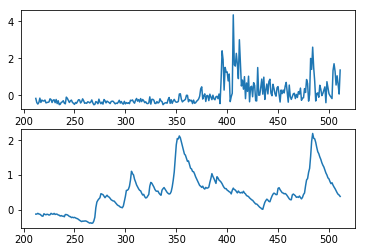

In [56]:

to_plot = (10*20, 5*20)

event = sorted[1]

plt.subplot(2, 1, 1)
plt.plot(session['behavior']['velocity_z_score'][event-to_plot[0]:event+to_plot[1]])
plt.subplot(2, 1, 2)
plt.plot(session['C_z_scored'].mean(axis=1)[event-to_plot[0]:event+to_plot[1]])

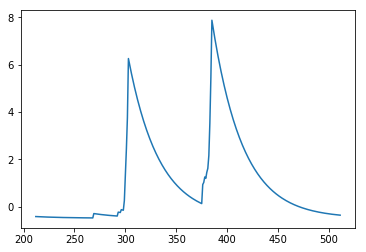

In [59]:
cell_num = 0
plt.plot(session['C_z_scored'][cell_num][event-to_plot[0]:event+to_plot[1]])

In [60]:
ma.count_events_in_array(session['C_z_scored'][cell_num][event-to_plot[0]:event+to_plot[1]].values, 20, 0.1, threshold=1, up=True)[1]

[88, 165]